<a href="https://colab.research.google.com/github/EmanAbdelhaleem/ML-Algorithms-Implementation/blob/main/ColorExtraction_Kmean_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import colorsys

In [ ]:
class KmeansClustering:

  def __init__(self,k=3):
    self.k = k
    self.centroids = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))  #axis = 1 makes the function work on cols

  @staticmethod
  def calculate_mean(data_points):
    sz = len(data_points)
    r = g = b = 0
    for point in data_points:
      r = r + point[0][0]
      g = g + point[0][1]
      b = b + point[0][2]

    return tuple([r/sz,g/sz,b/sz])

  @staticmethod
  def initialize_centroids(k,data):
    sz = len(data)
    centroids = []

    for i in range(k):
      random_point = np.random.randint(0,sz)
      centroids.append(data[random_point])
    return centroids

  def fit(self, X,k, max_iterations = 300):
    np.random.seed(200)
    self.centroids = KmeansClustering.initialize_centroids(k,X)


    for _ in range(max_iterations):
      y = []

      for data_point in X:
        distances = KmeansClustering.euclidean_distance(data_point, self.centroids)
        cluster_num = np.argmin(distances)
        y.append(cluster_num);

      y= np.array(y)

      clusters_grouped_points = []

      for i in range(self.k):
        clusters_grouped_points.append(np.argwhere(y == i))

      new_centroids = []

      for i, indices in enumerate(clusters_grouped_points):
        if(len(indices) == 0):
          new_centroids.append(self.centroids[i])
        else:
          new_centroids.append(KmeansClustering.calculate_mean(X[indices]))

      new_centroids = np.array(new_centroids)
      if np.max(self.centroids - new_centroids) < 0.0001:
        break
      self.centroids = new_centroids

    return self.centroids


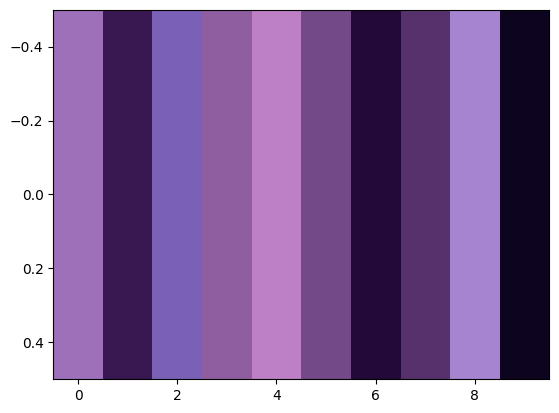

In [ ]:
photo = "6bc1af05c4e3065169e719d994b9fd70"
image = Image.open("/content/drive/My Drive/" + photo + ".jpg")
tuples_of_pixels = list(image.getdata())

def count_frequencies(pixels):
  colorfreq = {}

  for pixel in tuples_of_pixels:
      if pixel in colorfreq:
          colorfreq[pixel] += 1
      else:
          colorfreq[pixel]=1

  sorted_freqs = sorted(colorfreq.items(), key=lambda x:x[1], reverse=True)
  return sorted_freqs[:25000]


dominant_pixels = []
dominant_pixels_with_freqs = count_frequencies(tuples_of_pixels)
for _ in dominant_pixels_with_freqs:
  dominant_pixels.append(_[0])

dominant_pixels = np.array(dominant_pixels)
Dominant_colors = KmeansClustering(k=10).fit(dominant_pixels,10)
Dominant_colors = Dominant_colors.astype(np.int64)

plt.imshow([Dominant_colors], aspect='auto')
plt.show()